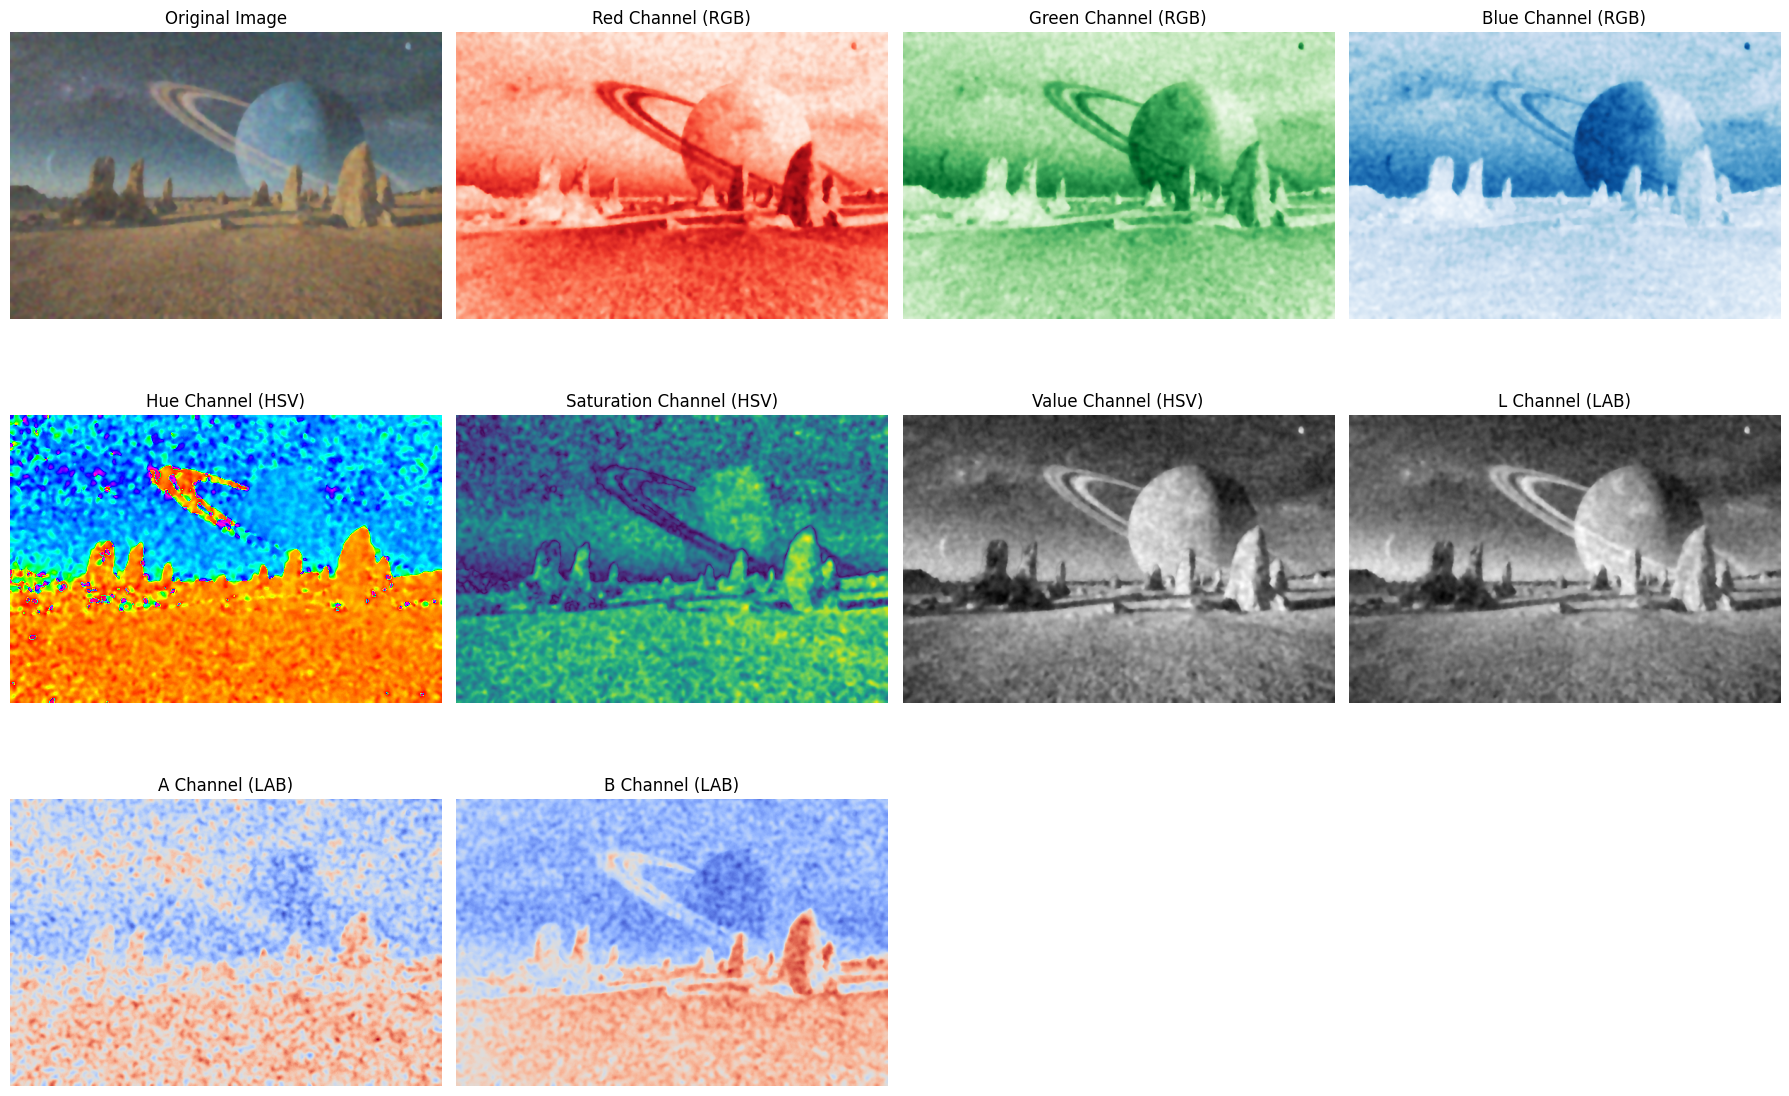

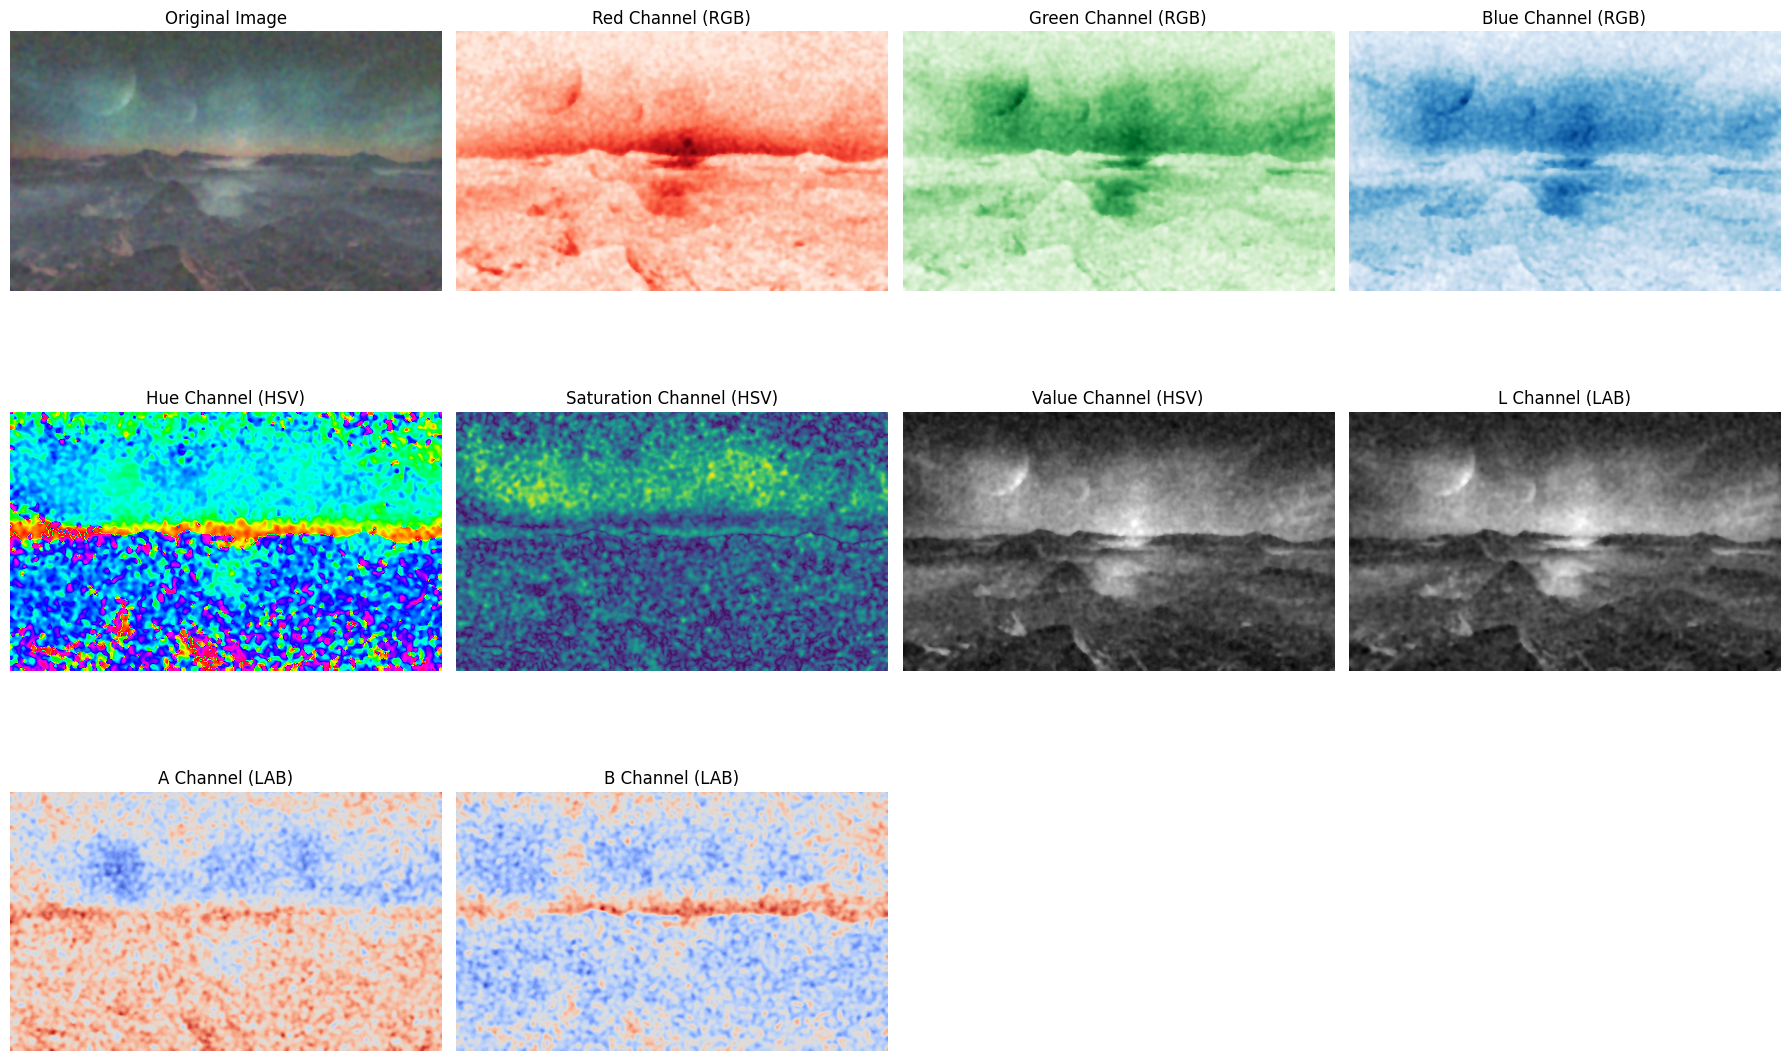

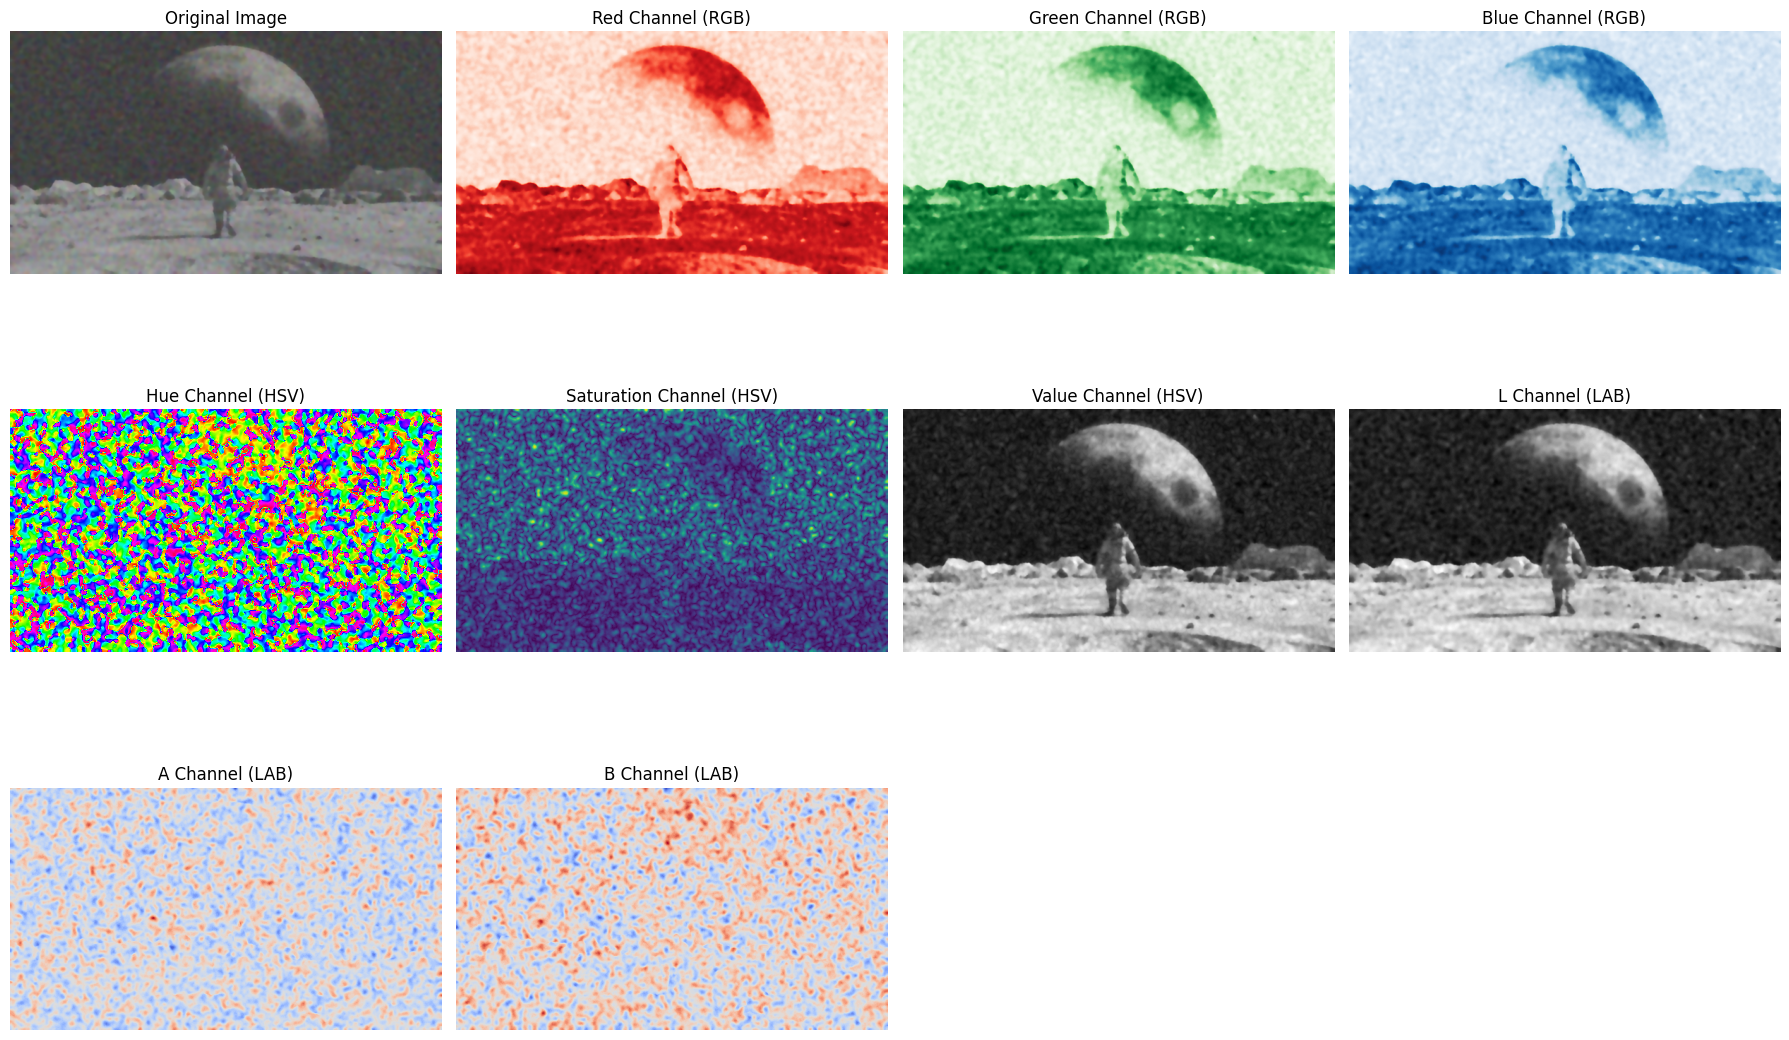

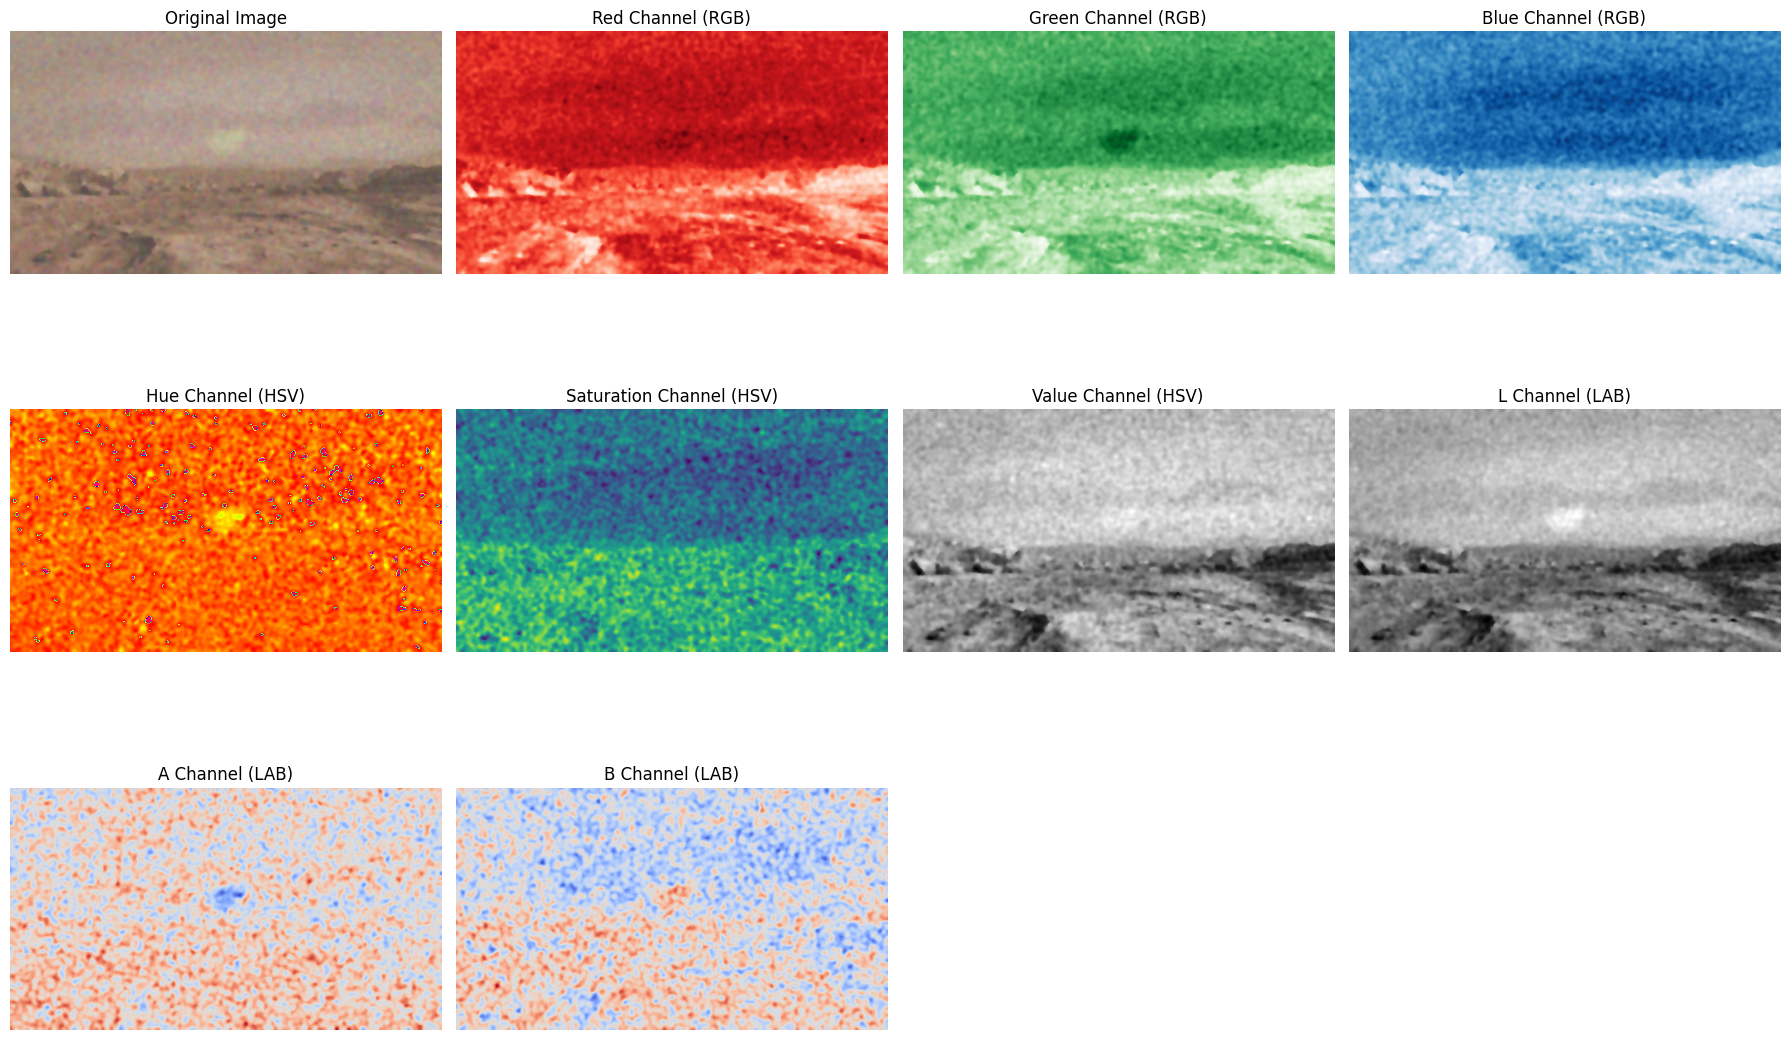

In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the noisy images
image_paths = [
    "/content/913058614-612x612.jpgnoisy.jpg",
    "/content/1098413160-612x612.jpgnoisy.jpg",
    "/content/1353996787-612x612.jpgnoisy.jpg",
    "/content/399382166-612x612.jpgnoisy.jpg"

]

# Function to load and convert images to different color spaces
def process_image(image_path):
    # Load the image
    image = cv2.imread(image_path, cv2.IMREAD_COLOR)

    if image is None:
        print(f"Error loading image: {image_path}")
        return
    # Apply noise reduction using Gaussian Blur
    gaussian_blur_image = cv2.GaussianBlur(image, (5, 5), 0)

    # Apply noise reduction using Bilateral Filtering
    bilateral_filter_image = cv2.bilateralFilter(gaussian_blur_image, d=9, sigmaColor=75, sigmaSpace=75)
    image=bilateral_filter_image
    # Convert to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert to HSV
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    # Convert to LAB
    image_lab = cv2.cvtColor(image, cv2.COLOR_BGR2LAB)

    # Extract color channels
    r, g, b = cv2.split(image_rgb)
    h, s, v = cv2.split(image_hsv)
    l, a, b_lab = cv2.split(image_lab)



    # Visualize the original and color channels
    plt.figure(figsize=(18, 12))

    plt.subplot(3, 4, 1)
    plt.title('Original Image')
    plt.imshow(image_rgb)
    plt.axis('off')

    plt.subplot(3, 4, 2)
    plt.title('Red Channel (RGB)')
    plt.imshow(r, cmap='Reds')
    plt.axis('off')

    plt.subplot(3, 4, 3)
    plt.title('Green Channel (RGB)')
    plt.imshow(g, cmap='Greens')
    plt.axis('off')

    plt.subplot(3, 4, 4)
    plt.title('Blue Channel (RGB)')
    plt.imshow(b, cmap='Blues')
    plt.axis('off')

    plt.subplot(3, 4, 5)
    plt.title('Hue Channel (HSV)')
    plt.imshow(h, cmap='hsv')
    plt.axis('off')

    plt.subplot(3, 4, 6)
    plt.title('Saturation Channel (HSV)')
    plt.imshow(s, cmap='viridis')
    plt.axis('off')

    plt.subplot(3, 4, 7)
    plt.title('Value Channel (HSV)')
    plt.imshow(v, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 8)
    plt.title('L Channel (LAB)')
    plt.imshow(l, cmap='gray')
    plt.axis('off')

    plt.subplot(3, 4, 9)
    plt.title('A Channel (LAB)')
    plt.imshow(a, cmap='coolwarm')
    plt.axis('off')

    plt.subplot(3, 4, 10)
    plt.title('B Channel (LAB)')
    plt.imshow(b_lab, cmap='coolwarm')
    plt.axis('off')

    plt.tight_layout()
    plt.show()
# Process each image
for image_path in image_paths:
    process_image(image_path)
